In [1]:
import sys; sys.path.append('../../wwa'); from wwa import *

In [2]:
def synth_plot(df, ax = None, logged = False, split_uw = False):
    
    # set split_uw = True to plot the unweighted mean of obs and models on its own line
    if not ax: fig, ax = plt.subplots(dpi = 100)
    
    gcols = {"obs" : "blue", 
             "obs_synth" : "blue", 
             "models" : "red", 
             "model_synth" : "red",
             "synth" : "magenta"}
    
    ylabels = df.model.to_list()
    
    ax.grid(axis = "x", which = "major", color = "k", alpha = 0.1)
    
    if logged:
        ax.set_xscale('log')
        ax.axvline(1, ls = "--", color = "k", zorder = -99)
    else:
        ax.axvline(0, ls = "--", color = "k", zorder = -99)
    
    for k in range(len(df)):

        r = df.iloc[k]
        ax.add_patch(Rectangle((r.lower,-k-0.4), r.upper - r.lower, 0.8, facecolor = gcols[r.name], alpha = 0.5 + 0.5*("synth" in r.name)))
        ax.plot(r.est, -k, color = "k", marker = "v")
        
        if not (split_uw and df.index[k] == "synth"): 
            ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))
        else:
            k = k+1
            ax.add_patch(Rectangle((r.l_wb,-k-0.4), r.u_wb - r.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))
            if logged:
                uw_mean = np.exp((np.log(df.loc["obs_synth", "est"]) + np.log(df.loc["model_synth", "est"])) / 2)
            else:
                uw_mean = (df.loc["obs_synth", "est"] + df.loc["model_synth", "est"]) / 2
            ax.plot(uw_mean, -k, color = "k", marker = "v")
            ylabels = ylabels + ["unweighted mean"]

    ax.set_yticks(range(0, -len(ylabels), -1))
    ax.set_yticklabels(ylabels)

In [4]:
# load data

s2013, s2024 = [pd.read_fwf("synth_"+y+".txt", comment = "#", widths = [5,5,12,12,12,12,12,4,99], header = None,
            names = ["ystart", "yend", "est", "lower", "upper", "l_wb", "u_wb", "group", "model"]) for y in ["2013", "2024"]]

Text(0.5, 1.0, '(b) Data to 2024')

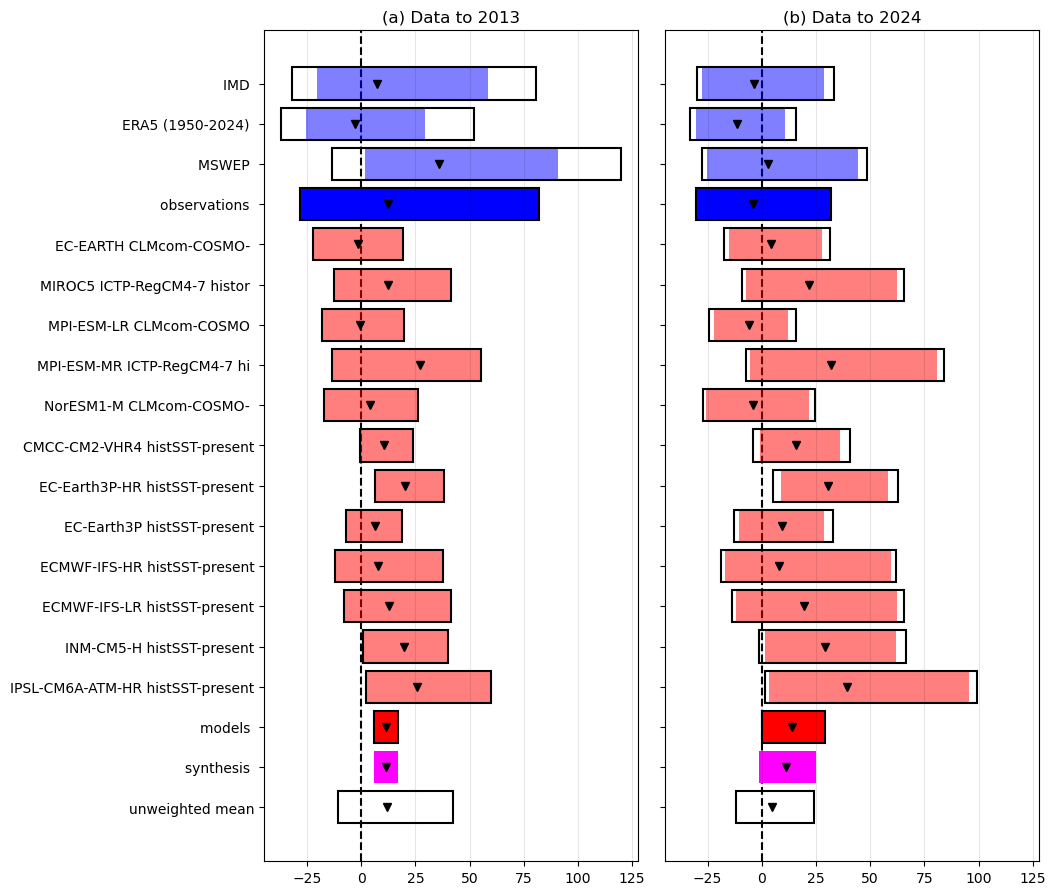

In [9]:
# fix group & model names
groups = [["obs","obs_synth","models","model_synth","synth"][i-1] for i in s2013.group]
s2013.index = groups; s2024.index = groups

models = [re.sub("ETH-","",re.sub("UGent-","",re.sub("rcp85 r[0-9]+i1p1 ", "", re.sub(" \(1\) ","",re.sub('"','',m))))) for m in s2024.model]
s2013["model"] = models; s2024["model"] = models

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fig, axs = plt.subplots(ncols = 2, sharey = True, sharex = True, figsize = (10,len(s2013)*0.6), dpi = 100)
plt.subplots_adjust(wspace = 0.07)

synth_plot(s2013, ax = axs[0], split_uw = True)
axs[0].set_title("(a) Data to 2013")

synth_plot(s2024, ax = axs[1], split_uw = True)
axs[1].set_title("(b) Data to 2024")

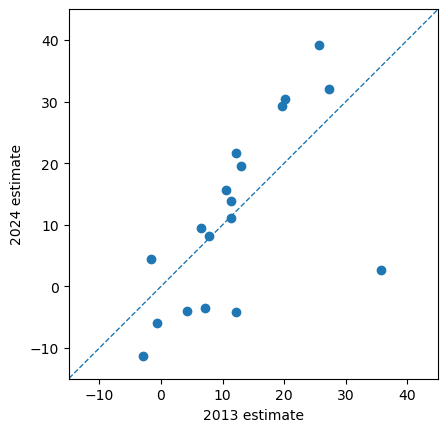

In [24]:
plt.scatter(s2013.est, s2024.est)
plt.gca().set_aspect("equal")
plt.xlabel("2013 estimate")
plt.ylabel("2024 estimate")
plt.xlim(-15,45)
plt.ylim(-15,45)
plt.plot((-20,50),(-20,50), ls = "--", lw = 1)

[Text(0, 0, 'EC-EARTH CLMcom-COSMO- '),
 Text(0, -3, 'MIROC5 ICTP-RegCM4-7 histor '),
 Text(0, -6, 'MPI-ESM-LR CLMcom-COSMO '),
 Text(0, -9, 'MPI-ESM-MR ICTP-RegCM4-7 hi '),
 Text(0, -12, 'NorESM1-M CLMcom-COSMO- '),
 Text(0, -15, 'CMCC-CM2-VHR4 histSST-present'),
 Text(0, -18, 'EC-Earth3P-HR histSST-present'),
 Text(0, -21, 'EC-Earth3P histSST-present'),
 Text(0, -24, 'ECMWF-IFS-HR histSST-present'),
 Text(0, -27, 'ECMWF-IFS-LR histSST-present'),
 Text(0, -30, 'INM-CM5-H histSST-present'),
 Text(0, -33, 'IPSL-CM6A-ATM-HR histSST-present')]

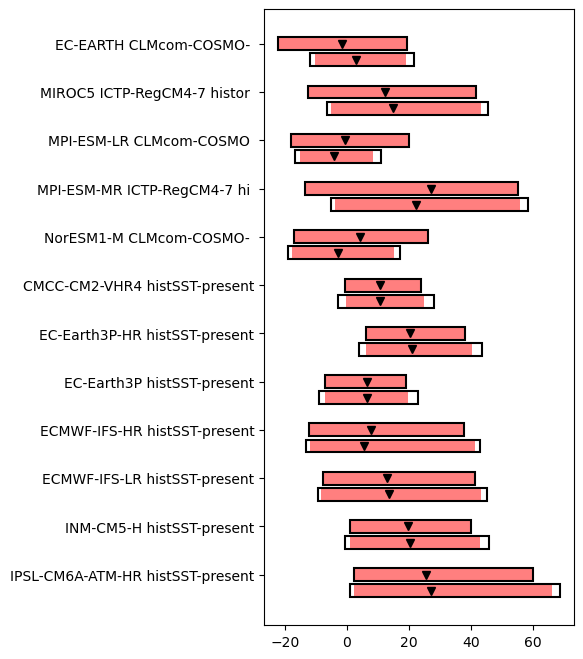

In [50]:
s2013 = s2013.loc["models"]
s2024 = s2024.loc["models"]

nc = 1
fig, axs = plt.subplots(ncols = nc, figsize = (nc*4, 8), dpi = 100)

ax = axs

c = 1.3/0.9

for i in range(len(s2013)):
    r2013, r2024 = [df.iloc[i] for df in [s2013, s2024]]

    k = i*3
    
    ax.add_patch(Rectangle((r2013.lower,-k-0.4), r2013.upper - r2013.lower, 0.8, facecolor = "red", alpha = 0.5))
    ax.plot(r2013.est, -k, color = "k", marker = "v")
    ax.add_patch(Rectangle((r2013.l_wb,-k-0.4), r2013.u_wb - r2013.l_wb, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

    k = k+1
    
    ax.add_patch(Rectangle((r2024.lower/c,-k-0.4), (r2024.upper - r2024.lower)/c, 0.8, facecolor = "red", alpha = 0.5))
    ax.plot(r2024.est/c, -k, color = "k", marker = "v")
    ax.add_patch(Rectangle((r2024.l_wb/c,-k-0.4), (r2024.u_wb - r2024.l_wb)/c, 0.8, edgecolor = "k", facecolor = "none", lw = 1.5))

ylabels = s2013.model.to_list()
ax.set_yticks(range(0, -len(ylabels)*3, -3))
ax.set_yticklabels(ylabels)